<a href="https://colab.research.google.com/github/letsbegincode/ML_algo/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#  Implementation of Gradient Descent



# Gradient Descent Variants

## Introduction
Gradient Descent is an optimization algorithm used to minimize functions, commonly used in machine learning to minimize the cost function. Below, we cover various types of gradient descent methods, including Batch Gradient Descent, Stochastic Gradient Descent, and Mini-Batch Gradient Descent.

# Task 1: Generating a Random Dataset and Finding Coefficients Using Gradient Descent

## Objective
In this task, we will:
1. Generate a random dataset using the `make_regression` function from `sklearn`.
2. Use gradient descent to find the coefficients (`coef_`) and intercept (`intercept_`) of a linear regression model.


In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [4]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

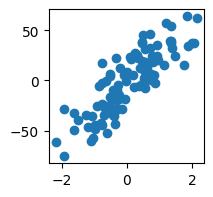

In [13]:
plt.figure(figsize=(2,2))
plt.scatter(X,y)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 2)

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.6345158782661012

Extension by first by making class for fit and predict using formula -

### Mean Squared Error Cost Function
$$
J(m, b) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - (mx_i + b))^2
$$

### Gradient with respect to \( m \)
$$
\frac{\partial J(m, b)}{\partial m} = -\frac{1}{n} \sum_{i=1}^{n} x_i (y_i - (mx_i + b))
$$

### Gradient with respect to \( b \)
$$
\frac{\partial J(m, b)}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} (y_i - (mx_i + b))
$$

### Update Rule for \( m \)
$$
m := m - \alpha \frac{\partial J(m, b)}{\partial m}
$$

### Update Rule for \( b \)
$$
b := b - \alpha \frac{\partial J(m, b)}{\partial b}
$$

Gradient with Respect to


### Update Rule for \( m \)
$$
m := m - \alpha \left( -\frac{1}{n} \sum_{i=1}^{n} x_i (y_i - (mx_i + b)) \right)
$$

### Update Rule for \( b \)
$$
b := b - \alpha \left( -\frac{1}{n} \sum_{i=1}^{n} (y_i - (mx_i + b)) \right)
$$


In [31]:

class GDRegressor:

    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)

    def predict(self,X):
        return self.m * X + self.b

In [26]:
gd = GDRegressor(0.001,50)

gd.fit(X_train,y_train)


28.159367347119066 -2.3004574196824854


In [29]:
y_pred = gd.predict(X_test)

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.6343842836315579

#Types of Gradient Descent




## 1. Batch Gradient Descent

### Mean Squared Error Cost Function
Batch Gradient Descent computes the gradient of the cost function using the entire dataset.

$$
J(m, b) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - (mx_i + b))^2
$$

### Gradient with Respect to \( m \)
$$
\frac{\partial J}{\partial m} = -\frac{1}{n} \sum_{i=1}^{n} x_i (y_i - (mx_i + b))
$$

### Gradient with Respect to \( b \)
$$
\frac{\partial J}{\partial b} = -\frac{1}{n} \sum_{i=1}^{n} (y_i - (mx_i + b))
$$

### Update Rule for \( m \)
$$
m := m - \alpha \left( -\frac{1}{n} \sum_{i=1}^{n} x_i (y_i - (mx_i + b)) \right)
$$

### Update Rule for \( b \)
$$
b := b - \alpha \left( -\frac{1}{n} \sum_{i=1}^{n} (y_i - (mx_i + b)) \right)
$$

### Advantages
- **Accuracy**: Provides a precise estimate of the gradient since it uses the entire dataset.
- **Stable Updates**: Generally results in stable and smooth convergence to the minimum.

### Disadvantages
- **Computationally Expensive**: Can be very slow for large datasets as it requires processing the entire dataset for each update.
- **Memory Usage**: Requires storing the entire dataset in memory, which may not be feasible for very large datasets.

In [32]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [33]:
X,y = load_diabetes(return_X_y=True) # returning x and y explicitly

In [40]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [59]:
#X

In [50]:
X_train, X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [48]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [51]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

# class for batch gradient descent

In [54]:

class GDRegressor:

    def __init__(self,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [56]:
gdr = GDRegressor(epochs =1000,learning_rate=0.5)

gdr.fit(X_train,y_train)

152.01351687661833 [  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278]


In [57]:
y_pred = gdr.predict(X_test)

In [58]:
r2_score(y_test,y_pred)

0.4534503034722803

## 2. Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent updates the parameters using only one data point at a time.

### Cost Function
The cost function is the same as in Batch Gradient Descent:

$$
J(m, b) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - (mx_i + b))^2
$$

### Gradient with Respect to \( m \) (for a single data point)
$$
\frac{\partial J}{\partial m} \approx -x_i (y_i - (mx_i + b))
$$

### Gradient with Respect to \( b \) (for a single data point)
$$
\frac{\partial J}{\partial b} \approx -(y_i - (mx_i + b))
$$

### Update Rule for \( m \)
$$
m := m - \alpha \left( -x_i (y_i - (mx_i + b)) \right)
$$

### Update Rule for \( b \)
$$
b := b - \alpha \left( -(y_i - (mx_i + b)) \right)
$$

### Advantages
- **Efficiency**: Requires less memory and computational resources as it processes one data point at a time.
- **Faster Convergence**: Can converge faster than Batch Gradient Descent due to frequent updates, which can be beneficial for large datasets.

### Disadvantages
- **Noisy Updates**: Updates can be noisy and may lead to oscillations or divergence if not properly tuned.
- **Less Accurate**: The gradient is computed based on a single data point, which can lead to less accurate updates compared to Batch Gradient Descent.

## class for stochastic-gradient-descent

In [67]:
class SGDRegressor:

    def __init__(self,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])

                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_

                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_


In [68]:
sgd = SGDRegressor(learning_rate=0.01,epochs=40)

In [69]:
sgd.fit(X_train,y_train)
y_pred = sgd.predict(X_test)

160.19074995429037 [  62.16642768  -38.65675442  321.32806586  228.21971075   30.4041768
   -5.46780503 -158.86115166  128.32518424  280.43720127  121.36138455]


In [70]:

r2_score(y_test,y_pred)

0.4078132440185448

## 3. Mini-Batch Gradient Descent

Mini-Batch Gradient Descent is a compromise between Batch and Stochastic Gradient Descent. It uses a subset of the data, called a mini-batch, for each update.

### Cost Function
The cost function is still the same:

$$
J(m, b) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - (mx_i + b))^2
$$

### Gradient with Respect to \( m \) (for a mini-batch)
$$
\frac{\partial J}{\partial m} = -\frac{1}{m} \sum_{i=1}^{m} x_i (y_i - (mx_i + b))
$$

### Gradient with Respect to \( b \) (for a mini-batch)
$$
\frac{\partial J}{\partial b} = -\frac{1}{m} \sum_{i=1}^{m} (y_i - (mx_i + b))
$$

### Update Rule for \( m \)
$$
m := m - \alpha \left( -\frac{1}{m} \sum_{i=1}^{m} x_i (y_i - (mx_i + b)) \right)
$$

### Update Rule for \( b \)
$$
b := b - \alpha \left( -\frac{1}{m} \sum_{i=1}^{m} (y_i - (mx_i + b)) \right)
$$

### Advantages
- **Balanced Approach**: Balances the computational efficiency and convergence stability. It benefits from faster convergence while still providing more stable updates than SGD.
- **Memory Efficient**: More memory-efficient than Batch Gradient Descent, especially for large datasets.

### Disadvantages
- **Tuning Required**: Requires careful tuning of the mini-batch size and learning rate to achieve optimal performance.
- **Still Noisy**: While less noisy than SGD, the updates can still be somewhat noisy compared to Batch Gradient Descent.




In [79]:
import random
class MBGDRegressor:

    def __init__(self,batch_size,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):

            for j in range(int(X_train.shape[0]/self.batch_size)):

                idx = random.sample(range(X_train.shape[0]),self.batch_size)

                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                #print("Shape of y_hat",y_hat.shape)
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [80]:

mbr = MBGDRegressor(batch_size=int(X_train.shape[0]/50),learning_rate=0.01,epochs=100)

In [81]:

mbr.fit(X_train,y_train)

152.61435435834505 [  29.12953505 -146.71650344  458.97700281  300.91376833  -28.46766282
  -95.68329806 -192.80965602  110.09448874  406.26912159  124.58353199]


In [82]:
y_pred = mbr.predict(X_test)

In [83]:

r2_score(y_test,y_pred)

0.4550694086875028

## Summary

- **Batch Gradient Descent**: Uses the entire dataset, providing precise gradients and stable convergence, but is computationally expensive and requires significant memory.
- **Stochastic Gradient Descent (SGD)**: Uses single data points for updates, making it more memory-efficient and faster for large datasets, but can be noisy and less accurate.
- **Mini-Batch Gradient Descent**: Offers a balance between accuracy and efficiency by using a subset of the data, combining benefits from both Batch and SGD but requiring careful tuning.

Feel free to modify the learning rate \(\alpha\) and other hyperparameters as needed for your specific problem.